# Train.csv

## Initial Exploration

In [ ]:
#Importing libraries for data preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
#Reading the KJ Marketing dataset and its characteristics
dataset = pd.read_csv("/content/traincsv.csv")
print(dataset)

        Customer_ID outlet_city luxury_sales fresh_sales dry_sales  \
0        10493832.0    Kelaniya       1209.6       756.0    5292.0   
1        10178643.0    Moratuwa      1590.12     1060.08   6007.12   
2        10513916.0     Wattala      2288.88     1481.04   9155.52   
3        10334589.0     Wattala      2274.94     1739.66   9099.76   
4        10458365.0    Kelaniya      2345.49     2069.55   9243.99   
...             ...         ...          ...         ...       ...   
774150   10197979.0     Gampaha       3893.4      3893.4   3448.44   
774151   10494575.0  Katunayake      6095.86     5557.99   6275.15   
774152   10565682.0     Colombo      5121.42     4820.16   4669.53   
774153   10351977.0       Kandy      6311.76     6311.76   5940.48   
774154   10637635.0     Negombo       5833.5     6027.95    6611.3   

       cluster_catgeory  
0                     4  
1                     1  
2                     4  
3                     4  
4                     4  
...

<ipython-input-36-aab173cbb43a>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("/content/traincsv.csv")


In [ ]:
dataset.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
list(dataset.columns)

['Customer_ID',
 'outlet_city',
 'luxury_sales',
 'fresh_sales',
 'dry_sales',
 'cluster_catgeory']

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [ ]:
dataset.describe()

,Customer_ID
count,7.741530e+05
mean,1.038708e+07
std,2.234795e+05
min,1.000000e+07
25%,1.019354e+07
50%,1.038708e+07
75%,1.058062e+07
max,1.077415e+07


In [ ]:
dataset.describe(include='object')

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
count,774153,774120,774114,774125.00,774154
unique,20,143897,257030,270131.00,18
top,Colombo,1029.6,6013.92,9168.72,1
freq,41031,62,28,23.00,188975


In [ ]:
#Get the total number of datapoints in the dataset
dataset.shape

(774155, 6)

In [ ]:
#Getting the data type of each attribute and commanding python to print categorical if it says object or numerical if it says int or float
for column in dataset.columns:
    attribute_type = dataset[column].dtype

    if attribute_type == "int64" or attribute_type == "float64":
      print(f"{column} - Numerical")
    elif attribute_type == "object":
        print(f"{column} - Categorical")

Customer_ID - Numerical
outlet_city - Categorical
luxury_sales - Categorical
fresh_sales - Categorical
dry_sales - Categorical
cluster_catgeory - Categorical


In [ ]:
dataset.isnull().sum()

,0
Customer_ID,2
outlet_city,2
luxury_sales,35
fresh_sales,41
dry_sales,30
cluster_catgeory,1


In [ ]:
#finding the number of duplicated entries for each attribute in the dataset
duplicated_values = dataset.duplicated().sum() #Gets the total number of duplicated records
print("These are the total count of duplicates in the dataset: ")
print("\n", duplicated_values)

These are the total count of duplicates in the dataset: 

 0


## Renaming Columns

In [ ]:
dataset = dataset.rename(columns={'cluster_catgeory': 'cluster_category'})


## Noisy Data

In [ ]:
def is_word_number(value):
    return any(char.isalpha() for char in str(value))

# Drop NaN values before checking
dataset_cleaned = dataset.dropna(subset=['luxury_sales', 'dry_sales', 'fresh_sales'])

# Apply function to check for word-based numbers
numbers_written_in_words = dataset_cleaned[['luxury_sales', 'dry_sales', 'fresh_sales']].applymap(is_word_number)

# Filter rows where at least one column has a word-based number
rows_with_word_numbers = dataset_cleaned[numbers_written_in_words.any(axis=1)]

# Display the filtered rows
print("Rows containing numbers written as words (without NaNs):")
print(rows_with_word_numbers)

<ipython-input-52-ab83cf5d87b4>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numbers_written_in_words = dataset_cleaned[['luxury_sales', 'dry_sales', 'fresh_sales']].applymap(is_word_number)


Rows containing numbers written as words (without NaNs):
        Customer_ID             outlet_city  \
80043    10774052.0                Kelaniya   
148029   10190107.0  Dehiwala-Mount Lavinia   
161810   10261075.0                Panadura   
174631   10273730.0                Homagama   
174714   10358037.0            Nuwara Eliya   
174720   10039004.0                Kaduwela   
175278   10347733.0              Peliyagoda   
268571   10047014.0                Panadura   
296621   10215937.0                Panadura   
297911   10189925.0                Kelaniya   
326334   10006007.0                Kaduwela   
326593   10467590.0            Nuwara Eliya   
327495   10099173.0                 Wattala   
327505   10312003.0                Kaduwela   
367935   10445384.0                   Galle   
497177   10537755.0                   Kandy   
497245   10468127.0                   Kandy   
558562   10076064.0             Trincomalee   
558897   10314616.0              Batticaloa   
752

In [ ]:
#The following library was installed to handle noisy data
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=768533f3fd6a8caee84f666bbb3a4a997368789ccacf4af3b629dc1b46fe737a
  Stored in directory: /root/.cache/pip/wheels/cd/ef/ae/073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [ ]:
from word2number import w2n
import re

# Function to convert word-based numbers to actual numbers
def convert_to_number(x):
    if pd.isna(x):  # Preserve NaN values
        return x
    if isinstance(x, str):
        x = x.lower().replace(",", "")  # Remove commas
        x = re.sub(r"[^\w\s]", "", x)  # Remove special characters
        words = x.split()
        filtered_words = [word for word in words if word in w2n.american_number_system]

        if filtered_words:  # If words are valid numbers
            try:
                return w2n.word_to_num(" ".join(filtered_words))
            except ValueError:
                return np.nan  # Return NaN for non-convertible cases
        elif x.replace(".", "", 1).isdigit():  # Check if it's a valid number
            return float(x)
        else:
            return np.nan  # Convert unrecognized text to NaN
    return x

# Convert columns safely
for column in ["luxury_sales", "fresh_sales", "dry_sales", "cluster_category"]:
    dataset[column] = dataset[column].apply(convert_to_number)


In [ ]:
#check if there are numbers above six in the cluster category column
if (dataset['cluster_category'] > 6).any():
    print("There are numbers above 6.")
else:
    print("There are no numbers above 6.")

There are numbers above 6.


In [ ]:
#Keeping all rows which have 6 and below in the cluster category column
dataset = dataset[dataset['cluster_category'] <= 6]

In [ ]:
#Rechecking if there are numbers above 6
count = (dataset['cluster_category'] > 6).sum()
print(count)

0


## Data Type Changes

In [ ]:
#changing the data types
import pandas as pd
dataset['Customer_ID'] =  dataset['Customer_ID'].astype('object')
dataset['outlet_city'] = dataset['outlet_city'].astype('category')
dataset['luxury_sales'] = dataset['luxury_sales'].astype('float64')
dataset['fresh_sales'] = dataset['fresh_sales'].astype('float64')
dataset['dry_sales'] = dataset['dry_sales'].astype('float64')
dataset['cluster_category'] = dataset['cluster_category'].astype('category')

print(dataset.dtypes)

Customer_ID           object
outlet_city         category
luxury_sales         float64
fresh_sales          float64
dry_sales            float64
cluster_category    category
dtype: object


In [ ]:
dataset.dtypes

,0
Customer_ID,object
outlet_city,category
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_category,category


## Outliers

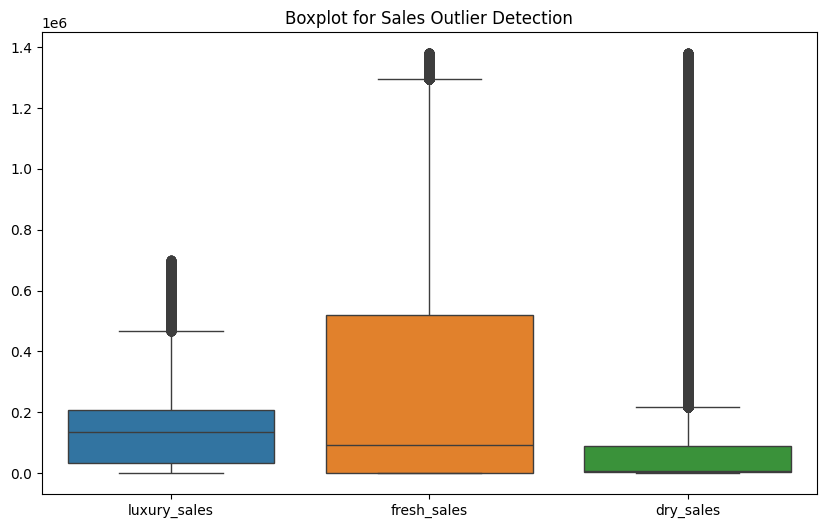

In [ ]:
#Outlier detection for each of the attributes
plt.figure(figsize=(10, 6))
#Using seaborn to illustrate a boxplot for the following attributes
sns.boxplot(data=dataset[['luxury_sales', 'fresh_sales', 'dry_sales']])
plt.title("Boxplot for Sales Outlier Detection")
plt.show()

In [ ]:
def find_extreme_outliers_IQR(dataset, columns):
    outliers_dict = {}  # Dictionary to store indexes of outliers for each column

    for col in columns:
        q1 = dataset[col].quantile(0.25)
        q3 = dataset[col].quantile(0.75)
        IQR = q3 - q1

        # Find outliers and store their indexes
        outlier_indexes = dataset[(dataset[col] < (q1 - 3 * IQR)) | (dataset[col] > (q3 + 3 * IQR))].index.tolist()
        outliers_dict[col] = outlier_indexes

    return outliers_dict

In [ ]:
# Columns to check for outliers
columns_to_check = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Find outlier indexes for multiple columns
outliers_dict = find_extreme_outliers_IQR(dataset, columns_to_check)

# Print the indexes of outliers for each column
for col, indexes in outliers_dict.items():
    print(f"Outlier indexes in {col}: {indexes}")


Outlier indexes in luxury_sales: []
Outlier indexes in fresh_sales: []
Outlier indexes in dry_sales: [131073, 131074, 131094, 131103, 131117, 131118, 131119, 131121, 131130, 131135, 131146, 131147, 131157, 131159, 131175, 131176, 131182, 131191, 131194, 131200, 131209, 131226, 131227, 131231, 131237, 131239, 131255, 131259, 131260, 131264, 131266, 131267, 131270, 131274, 131281, 131282, 131285, 131286, 131294, 131296, 131297, 131305, 131308, 131321, 131336, 131342, 131343, 131351, 131356, 131358, 131359, 131360, 131366, 131369, 131371, 131376, 131379, 131386, 131402, 131403, 131407, 131409, 131410, 131423, 131425, 131428, 131458, 131464, 131469, 131484, 131493, 131506, 131513, 131514, 131520, 131523, 131531, 131541, 131543, 131553, 131557, 131560, 131564, 131567, 131569, 131579, 131597, 131610, 131614, 131615, 131616, 131617, 131622, 131627, 131631, 131646, 131651, 131652, 131661, 131665, 131666, 131674, 131678, 131679, 131683, 131687, 131688, 131689, 131691, 131695, 131697, 131711, 13

In [ ]:
# Combine all outlier indexes from different columns into one list
all_outlier_indexes = set(index for indexes in outliers_dict.values() for index in indexes)

# Remove rows with these outlier indexes
dataset= dataset.drop(all_outlier_indexes)

## Imputation

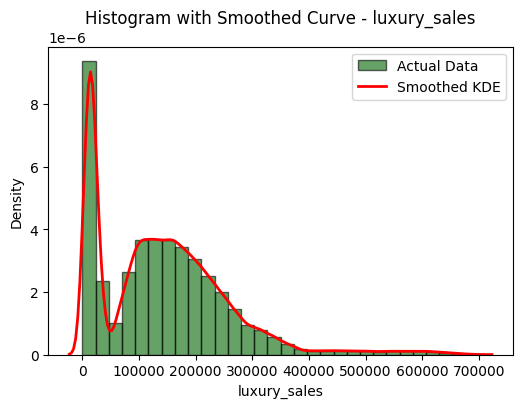

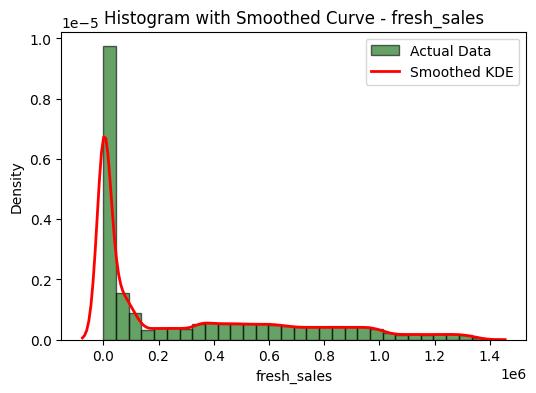

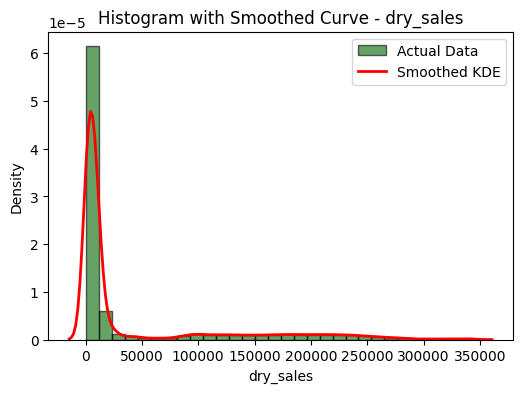

In [ ]:
columns = ['luxury_sales', 'fresh_sales', 'dry_sales']


for column in columns:
    data = dataset[column]

    # Create histogram
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='darkgreen', edgecolor='black', label='Actual Data')

    # Generate a smoothed line using Kernel Density Estimation (KDE)
    sns.kdeplot(data, color='red', linewidth=2, label='Smoothed KDE')

    # Labels and Title
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Histogram with Smoothed Curve - {column}')
    plt.legend()

    # Show plot
    plt.show()

In [ ]:
dataset.isnull().sum()

,0
Customer_ID,2
outlet_city,2
luxury_sales,34
fresh_sales,45
dry_sales,37
cluster_category,0


In [ ]:
#Finding the missing values of the dataset
missing_values_product = dataset.isnull().sum() / len(dataset) * 100
missing_values_product.head(50)

,0
Customer_ID,0.000281
outlet_city,0.000281
luxury_sales,0.004771
fresh_sales,0.006315
dry_sales,0.005192
cluster_category,0.000000


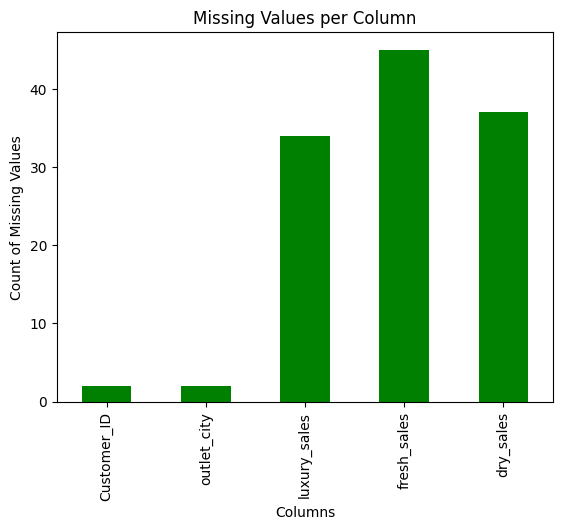

In [ ]:
missing_values_count = dataset.isnull().sum()

# Plot
missing_values_count[missing_values_count > 0].plot(kind='bar', color='green')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values per Column')
plt.show()


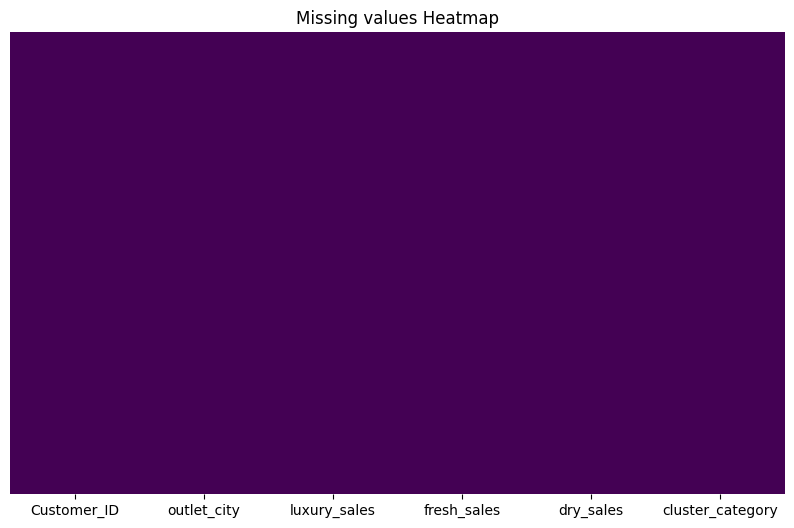

In [ ]:
#Generating a heatmap to detect missing values in the dataset
plt.figure(figsize=(10, 6))
#Using seaborn to illustrate the heatmap
sns.heatmap(dataset[dataset.columns].isnull(), cmap = 'viridis', cbar = False, yticklabels = False)
plt.title("Missing values Heatmap")
plt.show()

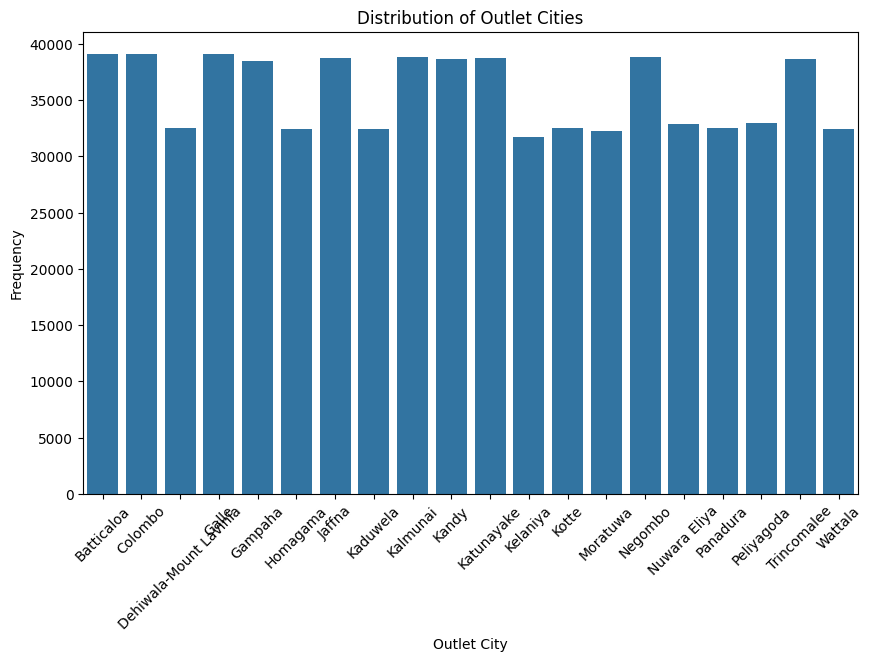

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x=dataset["outlet_city"])
plt.xlabel("Outlet City")
plt.ylabel("Frequency")
plt.title("Distribution of Outlet Cities")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

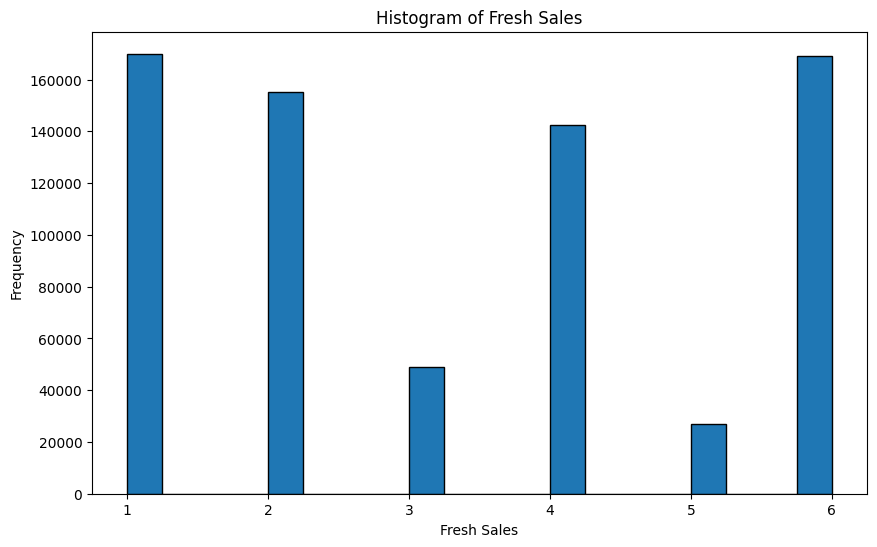

In [ ]:
# Assuming 'fresh_sales' is the column you want to create a histogram for
plt.figure(figsize=(10, 6))
plt.hist(dataset['cluster_category'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Fresh Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Fresh Sales')
plt.show()


In [ ]:
#Mean inputation implemented for the following columns
dataset["fresh_sales"] = dataset["fresh_sales"].fillna(dataset["fresh_sales"].median())
dataset["dry_sales"] = dataset["dry_sales"].fillna(dataset["dry_sales"].median())
dataset["luxury_sales"] = dataset["luxury_sales"].fillna(dataset["luxury_sales"].median())
dataset['outlet_city'] = dataset['outlet_city'].fillna(dataset['outlet_city'].mode()[0])
dataset['cluster_category'] = dataset['cluster_category'].fillna(dataset['cluster_category'].mode()[0])


In [ ]:
# Remove rows with null 'Customer_ID' values
dataset = dataset.dropna(subset=['Customer_ID'])

In [ ]:
#Finding the missing values of the dataset after mean inputation on luxury sales, dry sales and fresh sales columns accordingly
missing_values_product = dataset.isnull().sum() / len(dataset) * 100
missing_values_product.head(50)

,0
Customer_ID,0.0
outlet_city,0.0
luxury_sales,0.0
fresh_sales,0.0
dry_sales,0.0
cluster_category,0.0


## Encoding

In [ ]:
#Encoding the outley_city column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset["city_encoded"] = label_encoder.fit_transform(dataset["outlet_city"])
dataset["city_encoded"] = dataset["city_encoded"] + 1
dataset.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category,city_encoded
0,10493832.0,Kelaniya,12096.0,756.00,5292.00,4.0,12
1,10178643.0,Moratuwa,159012.0,1060.08,6007.12,1.0,14
2,10513916.0,Wattala,228888.0,1481.04,9155.52,4.0,20
3,10334589.0,Wattala,227494.0,1739.66,9099.76,4.0,20
4,10458365.0,Kelaniya,234549.0,2069.55,9243.99,4.0,12


## Feature Scaling

<Axes: xlabel='fresh_sales', ylabel='Density'>

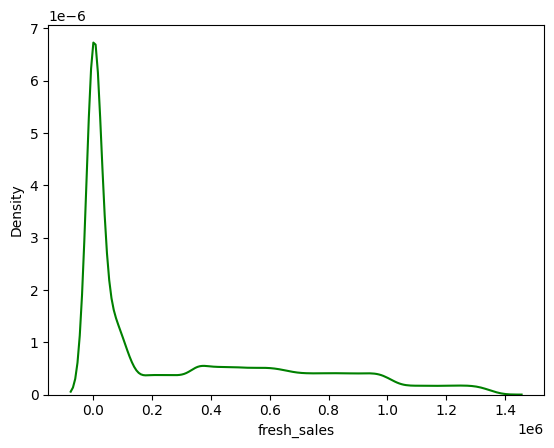

In [ ]:
sns.kdeplot(dataset['fresh_sales'], color='green')

<Axes: xlabel='luxury_sales', ylabel='Density'>

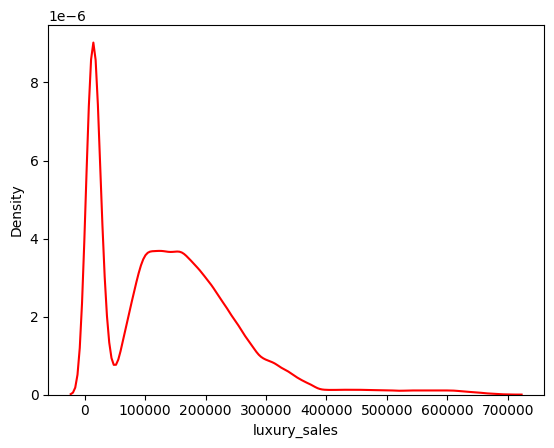

In [ ]:
sns.kdeplot(dataset['luxury_sales'], color='red')

<Axes: xlabel='dry_sales', ylabel='Density'>

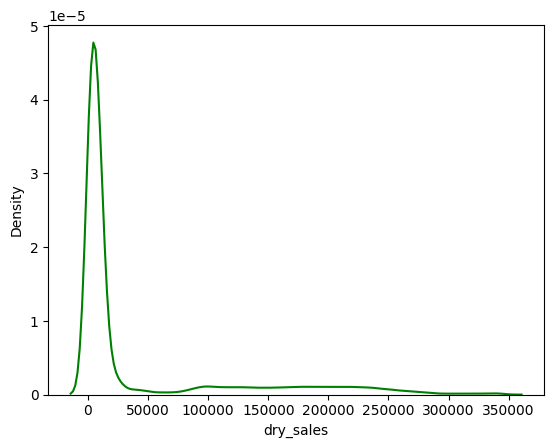

In [ ]:
sns.kdeplot(dataset['dry_sales'], color='green')

Since the team has removed all the outliers in this dataset, the columns namely, luxury sales, fresh sales and dry sales appear to be positively skewed. Therefore, it was concluded that the scaling type for this dataset would be Min - Max scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
columns = ['luxury_sales', 'fresh_sales', 'dry_sales']
# Excluding 'outlet_city' and other non-numeric columns

# Apply the scaling to the selected numerical features
minmax_scaling = scaler.fit_transform(dataset[columns])

# Create a new DataFrame with the scaled numerical features
minmax_scaling_dataset = pd.DataFrame(minmax_scaling, columns=columns, index=dataset.index)

# Concatenate the scaled numerical features with the original DataFrame's non-numerical columns
scaled_dataset = pd.concat([dataset.drop(columns=columns), minmax_scaling_dataset], axis=1)

# Display the scaled dataset
print("Scaled Dataset:")
print(scaled_dataset)

Scaled Dataset:
       Customer_ID outlet_city cluster_category  city_encoded  luxury_sales  \
0       10493832.0    Kelaniya              4.0            12      0.017272   
1       10178643.0    Moratuwa              1.0            14      0.227165   
2       10513916.0     Wattala              4.0            20      0.326993   
3       10334589.0     Wattala              4.0            20      0.325002   
4       10458365.0    Kelaniya              4.0            12      0.335081   
...            ...         ...              ...           ...           ...   
774150  10197979.0     Gampaha              3.0             5      0.055615   
774151  10494575.0  Katunayake              3.0            11      0.870880   
774152  10565682.0     Colombo              3.0             2      0.731666   
774153  10351977.0       Kandy              3.0            10      0.901724   
774154  10637635.0     Negombo              3.0            15      0.083332   

        fresh_sales  dry_sales  
0 

In [ ]:
from google.colab import files
scaled_dataset.to_csv('cleaned_train.csv', index=False)  # Save file
files.download('cleaned_train.csv')  # Download to local machine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Test.csv

## Initial Exploration

In [ ]:
#Importing libraries for data preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
#Reading the KJ Marketing dataset and its characteristics
dataset_test = pd.read_csv("/content/test.csv")
print(dataset_test)

       Customer_ID outlet_city luxury_sales fresh_sales  \
0            33574  batticaloa       2686.5        3582   
1            10089  batticaloa      1717.56     2576.34   
2            38329  batticaloa       854.04     1242.24   
3            11376  batticaloa      1638.12     2320.67   
4            12410  batticaloa      1039.09     1518.67   
...            ...         ...          ...         ...   
40744        33698     Wattala      3916.48     4161.26   
40745         4185     Wattala      3191.92     3004.16   
40746        28664     Wattala       3838.6      3951.5   
40747        11874     Wattala      4313.76     4183.04   
40748        11431     Wattala      4212.16     4212.16   

                                   dry_sales  
0                                      12537  
1                                    9446.58  
2                                    5201.88  
3                                    9282.68  
4                                    5435.24  
...      

In [ ]:
print(dataset_test.head())

   Customer_ID outlet_city luxury_sales fresh_sales dry_sales
0        33574  batticaloa       2686.5        3582     12537
1        10089  batticaloa      1717.56     2576.34   9446.58
2        38329  batticaloa       854.04     1242.24   5201.88
3        11376  batticaloa      1638.12     2320.67   9282.68
4        12410  batticaloa      1039.09     1518.67   5435.24


In [ ]:
# Column names
print("\nColumn names in dataset:")
print(dataset_test.columns)


Column names in dataset:
Index(['Customer_ID', 'outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales'],
      dtype='object')


In [ ]:
#info
print("\nDataset Info:")
print(dataset_test.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB
None


In [ ]:
dataset_test.dtypes

,0
Customer_ID,int64
outlet_city,object
luxury_sales,object
fresh_sales,object
dry_sales,object


In [ ]:
#Description
print("\nDescription:")
print(dataset_test.describe())


Description:
        Customer_ID
count  40749.000000
mean   20375.000000
std    11763.367396
min        1.000000
25%    10188.000000
50%    20375.000000
75%    30562.000000
max    40749.000000


In [ ]:
dataset_test.describe(include='object')

,outlet_city,luxury_sales,fresh_sales,dry_sales
count,40749,40749,40749,40749
unique,27,33183,36100,35771
top,Jaffna,1801.8,1161.6,2694.6
freq,2226,7,5,5


In [ ]:
#Shape of the dataset
print("Shape of dataset:", dataset_test.shape)


Shape of dataset: (40749, 5)


In [ ]:
dataset_test.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0


In [ ]:
#finding the number of duplicated entries for each attribute in the dataset
duplicated_values = dataset_test.duplicated().sum() #Gets the total number of duplicated records
print("These are the total count of duplicates in the dataset: ")
print("\n", duplicated_values)

These are the total count of duplicates in the dataset: 

 0


In [ ]:
#Getting the data type of each attribute and commanding python to print categorical if it says object or numerical if it says int or float
for column in dataset_test.columns:
    attribute_type = dataset_test[column].dtype

    if attribute_type == "int64" or attribute_type == "float64":
      print(f"{column} - Numerical")
    elif attribute_type == "object":
        print(f"{column} - Categorical")

Customer_ID - Numerical
outlet_city - Categorical
luxury_sales - Categorical
fresh_sales - Categorical
dry_sales - Categorical


## Noisy Data

In [ ]:
def is_word_number(value):
    return any(char.isalpha() for char in str(value))

# Drop NaN values before checking
dataset_cleaned = dataset_test.dropna(subset=['luxury_sales', 'dry_sales', 'fresh_sales'])

# Apply function to check for word-based numbers
numbers_written_in_words = dataset_cleaned[['luxury_sales', 'dry_sales', 'fresh_sales']].applymap(is_word_number)

# Filter rows where at least one column has a word-based number
rows_with_word_numbers = dataset_cleaned[numbers_written_in_words.any(axis=1)]

# Display the filtered rows
print("Rows containing numbers written as words (without NaNs):")
print(rows_with_word_numbers)

<ipython-input-8-0529008a66a9>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numbers_written_in_words = dataset_cleaned[['luxury_sales', 'dry_sales', 'fresh_sales']].applymap(is_word_number)


Rows containing numbers written as words (without NaNs):
       Customer_ID   outlet_city                       luxury_sales  \
6            10364    batticaloa   Seven Hundread and sixty Ruppees   
6299          4059  Anuradhapura  Eight Hundread and fifteen ruppes   
13949        28662        Jaffna                            2195.84   
40746        28664       Wattala                             3838.6   

                 fresh_sales                              dry_sales  
6                      914.4                                 3352.8  
6299                 1548.69                                 5705.7  
13949  Nine thousand ruppess                                1509.64  
40746                 3951.5  Three Thousand seven hundread ruppees  


In [ ]:
#The following library was installed to handle noisy data
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=5eb2c1f3b36e60a06811544ad462b761c7cb1715eedba2fd2de081dea87600ee
  Stored in directory: /root/.cache/pip/wheels/cd/ef/ae/073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [ ]:
from word2number import w2n
import re

# Function to convert word-based numbers to actual numbers
def convert_to_number(x):
    if pd.isna(x):  # Preserve NaN values
        return x
    if isinstance(x, str):
        x = x.lower().replace(",", "")  # Remove commas
        x = re.sub(r"[^\w\s]", "", x)  # Remove special characters
        words = x.split()
        filtered_words = [word for word in words if word in w2n.american_number_system]

        if filtered_words:  # If words are valid numbers
            try:
                return w2n.word_to_num(" ".join(filtered_words))
            except ValueError:
                return np.nan  # Return NaN for non-convertible cases
        elif x.replace(".", "", 1).isdigit():  # Check if it's a valid number
            return float(x)
        else:
            return np.nan  # Convert unrecognized text to NaN
    return x

# Convert columns safely
for column in ["luxury_sales", "fresh_sales", "dry_sales"]:
    dataset_test[column] = dataset_test[column].apply(convert_to_number)


In [ ]:
# Capitalize the first letter of each word in 'outlet_city' and convert 'trincomale' to 'trincomalee'
dataset_test['outlet_city'] = dataset_test['outlet_city'].str.title()
dataset_test['outlet_city'] = dataset_test['outlet_city'].str.replace('Trincomale', 'Trincomalee')

## Changing Data Types

In [ ]:
#changing the data types
import pandas as pd
dataset_test['Customer_ID'] =  dataset_test['Customer_ID'].astype('object')
dataset_test['outlet_city'] =  dataset_test['outlet_city'].astype('category')
dataset_test['luxury_sales'] = dataset_test['luxury_sales'].astype('float64')
dataset_test['fresh_sales'] = dataset_test['fresh_sales'].astype('float64')
dataset_test['dry_sales'] = dataset_test['dry_sales'].astype('float64')
print(dataset_test.dtypes)

Customer_ID       object
outlet_city     category
luxury_sales     float64
fresh_sales      float64
dry_sales        float64
dtype: object


In [ ]:
dataset_test.dtypes

,0
Customer_ID,object
outlet_city,category
luxury_sales,float64
fresh_sales,float64
dry_sales,float64


## Outliers

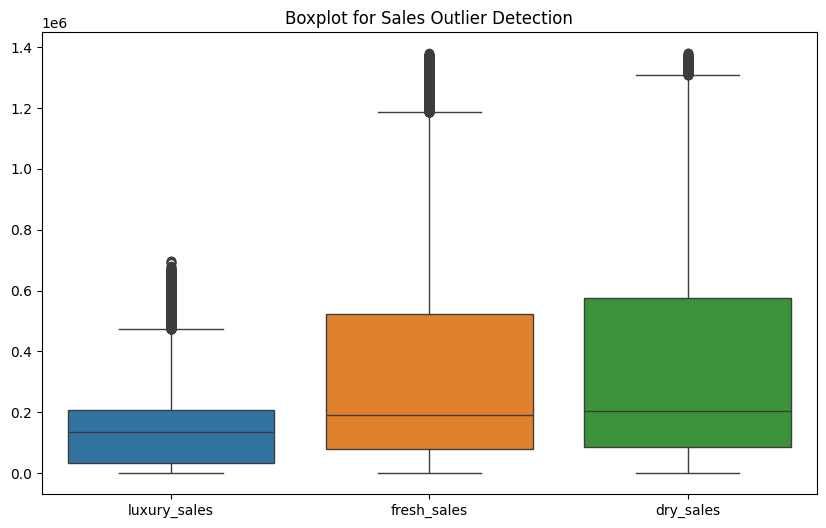

In [ ]:
#Outlier detection for each of the attributes
plt.figure(figsize=(10, 6))
#Using seaborn to illustrate a boxplot for the following attributes
sns.boxplot(data=dataset_test[['luxury_sales', 'fresh_sales', 'dry_sales']])
plt.title("Boxplot for Sales Outlier Detection")
plt.show()

In [ ]:
def find_extreme_outliers_IQR(df, columns):
    outliers_dict = {}  # Dictionary to store indexes of outliers for each column

    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1

        # Find outliers and store their indexes
        outlier_indexes = df[(df[col] < (q1 - 3 * IQR)) | (df[col] > (q3 + 3 * IQR))].index.tolist()
        outliers_dict[col] = outlier_indexes

    return outliers_dict

In [ ]:
# Columns to check for outliers
columns_to_check = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Find outlier indexes for multiple columns
outliers_dict = find_extreme_outliers_IQR(dataset_test, columns_to_check)

# Print the indexes of outliers for each column
for col, indexes in outliers_dict.items():
    print(f"Outlier indexes in {col}: {indexes}")


Outlier indexes in luxury_sales: []
Outlier indexes in fresh_sales: []
Outlier indexes in dry_sales: []


## Imputation

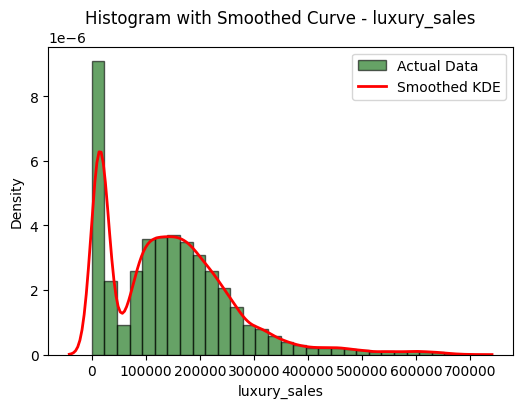

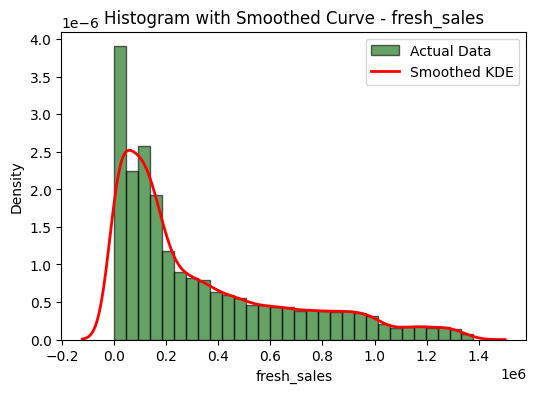

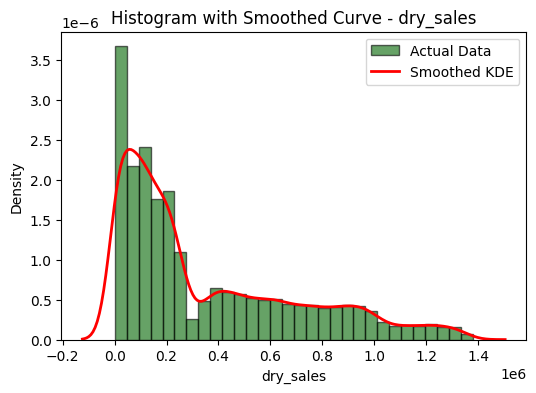

In [ ]:
columns = ['luxury_sales', 'fresh_sales', 'dry_sales']


for column in columns:
    data = dataset_test[column]

    # Create histogram
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='darkgreen', edgecolor='black', label='Actual Data')

    # Generate a smoothed line using Kernel Density Estimation (KDE)
    sns.kdeplot(data, color='red', linewidth=2, label='Smoothed KDE')

    # Labels and Title
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Histogram with Smoothed Curve - {column}')
    plt.legend()

    # Show plot
    plt.show()

In [ ]:
dataset_test.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0


In [ ]:
#Mean inputation implemented for the following columns
dataset_test["fresh_sales"] = dataset_test["fresh_sales"].fillna(dataset_test["fresh_sales"].median())
dataset_test["dry_sales"] = dataset_test["dry_sales"].fillna(dataset_test["dry_sales"].median())
dataset_test["luxury_sales"] = dataset_test["luxury_sales"].fillna(dataset_test["luxury_sales"].median())
dataset_test['outlet_city'] = dataset_test['outlet_city'].fillna(dataset_test['outlet_city'].mode()[0])


## Encoding

In [ ]:
#Encoding the outley_city column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset_test["city_encoded"] = label_encoder.fit_transform(dataset_test["outlet_city"])
dataset_test["city_encoded"] = dataset_test["city_encoded"] + 1
dataset_test.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,city_encoded
0,33574,Batticaloa,26865.0,3582.0,12537.0,2
1,10089,Batticaloa,171756.0,257634.0,944658.0,2
2,38329,Batticaloa,85404.0,124224.0,520188.0,2
3,11376,Batticaloa,163812.0,232067.0,928268.0,2
4,12410,Batticaloa,103909.0,151867.0,543524.0,2


## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
columns = ['luxury_sales', 'fresh_sales', 'dry_sales']
# Excluding 'outlet_city' and other non-numeric columns

# Apply the scaling to the selected numerical features
minmax_scaling = scaler.fit_transform(dataset_test[columns])

# Create a new DataFrame with the scaled numerical features
minmax_scaling_dataset = pd.DataFrame(minmax_scaling, columns=columns, index=dataset_test.index)

# Concatenate the scaled numerical features with the original DataFrame's non-numerical columns
dataset_test = pd.concat([dataset_test.drop(columns=columns), minmax_scaling_dataset], axis=1)

# Display the scaled dataset
print("Scaled Dataset:")
print(dataset_test)

Scaled Dataset:
      Customer_ID outlet_city  city_encoded  luxury_sales  fresh_sales  \
0           33574  Batticaloa             2      0.038426     0.002223   
1           10089  Batticaloa             2      0.245845     0.186452   
2           38329  Batticaloa             2      0.122227     0.089708   
3           11376  Batticaloa             2      0.234473     0.167912   
4           12410  Batticaloa             2      0.148718     0.109754   
...           ...         ...           ...           ...          ...   
40744       33698     Wattala            23      0.560632     0.301385   
40745        4185     Wattala            23      0.456907     0.217476   
40746       28664     Wattala            23      0.054919     0.028281   
40747       11874     Wattala            23      0.617505     0.302964   
40748       11431     Wattala            23      0.602960     0.305076   

       dry_sales  
0       0.008710  
1       0.684450  
2       0.376731  
3       0.672568  


In [ ]:
dataset_test.isnull().sum()

,0
Customer_ID,0
outlet_city,0
city_encoded,0
luxury_sales,0
fresh_sales,0
dry_sales,0


In [ ]:
dataset_test.to_csv('cleaned_test.csv', index=False)  # Save the file
files.download('cleaned_test.csv')  # Trigger download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>